In [51]:
import matplotlib.pyplot as plt
import numpy as np

input_range = range(23,31)
n=len(input_range)
dataList = np.empty([3,n])
for id in input_range:
    with open("../mNETseq/STARout/"+str(id)+"Log.final.out",'r') as f:
        lines = f.readlines()
        for i,l in enumerate(lines):
            if i == 5:
                dataList[0,id-23] = int(l.split("|")[1].strip())
            elif i == 8:
                dataList[1,id-23] = int(l.split("|")[1].strip())
            elif i == 23:
                dataList[2,id-23] = int(l.split("|")[1].strip())

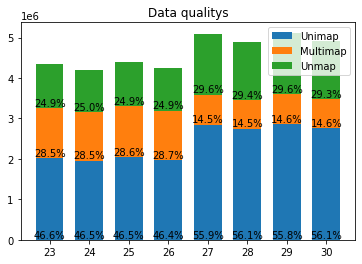

In [91]:
species = (
    [str(i) for i in input_range]
)
weight_counts = {
    "Unimap": dataList[1,...],
    "Multimap": dataList[2,...],
    "Unmap": dataList[0,...]-dataList[1,...]-dataList[2,...]
}
weight_percents = {
    "Unimap": dataList[1,...]/dataList[0,...],
    "Multimap": dataList[2,...]/dataList[0,...],
    "Unmap": (dataList[0,...]-dataList[1,...]-dataList[2,...])/dataList[0,...]
}
width = 0.7

fig, ax = plt.subplots()
bottom = np.zeros(n)

# for boolean, weight_count in weight_counts.items():
#     p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
#     # ax.text(species, weight_percent)
#     bottom += weight_count


# ax.set_title("Data qualitys")
# ax.legend(loc="upper right")
# plt.show()

for label, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=label, bottom=bottom)
    for rect in p:
        index = rect.get_x() + rect.get_width() / 2
        category_index = int(index)
        height = bottom[category_index]
        percentage = weight_percents[label][category_index] * 100
        ax.text(index, height, f'{percentage:.1f}%', ha='center', va='bottom')
    bottom += weight_count

ax.set_title("Data qualitys")
ax.legend(loc="upper right")
plt.show()